In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 34.8 MB/s 
     |████████████████████████████████| 9.8 MB 58.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install statsmodels==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 1.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


In [ ]:
import pandas as pd 
import pandas_datareader as web 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

Time Serier analysis of rose sales: different approaches

Importing the dataset. Dataset of sales of roses from 2010 to 2022

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2010_2021_fuego_exp_1.xlsx to 2010_2021_fuego_exp_1.xlsx


In [ ]:
read_file = pd.read_excel ('2010_2021_fuego_exp_1.xlsx')
read_file.to_csv ('2010_2021_fuego_exp_1.xlsx', index = None, header=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.


dataset is loaded as pandas dataframe

In [ ]:
df = pd.read_csv('2010_2021_fuego_exp_1.xlsx')
df.head()

,date,all,average
0,2013-01-01,7029,7993
1,2013-02-01,9161,10666
2,2013-03-01,7272,5206
3,2013-04-01,8117,3031
4,2013-05-01,13694,3486


time serier building

Converting the dataset to time series through converting columns with dates to datetime (to_datetime()). String turns into datetime format.The index of the dataframe is being setted to the columns with dates (set_index()).

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df.set_index('date', inplace=True)
ts = df['all']

In [ ]:
df

,all,average
date,,
2013-01-01,7029,7993
2013-02-01,9161,10666
2013-03-01,7272,5206
2013-04-01,8117,3031
2013-05-01,13694,3486
2013-06-01,7368,2777
2013-07-01,10076,2625
2013-08-01,13195,3012
2013-09-01,9161,3448


In [ ]:
ts_a = df['average']

checking the data type

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2013-01-01 to 2022-05-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   all      113 non-null    int64
 1   average  113 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB
None


Plotting the time-series

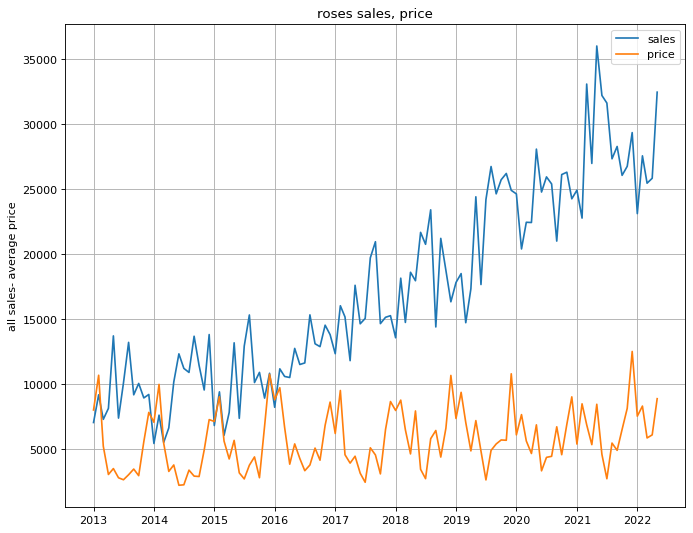

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(ts, label='sales')
plt.plot(ts_a, label='price')
plt.title('roses sales, price')
plt.ylabel('all sales- average price')
plt.legend()
plt.grid()
plt.show()

split the time series

First part of time series becomes a train set and second one is test set for testing the perfomance of the models. The test set includes 2022 year data. We will test how good the perfomance was comparing the real data and prediction built on historical data.

date
2022-02-01    27546
2022-03-01    25441
2022-04-01    25819
2022-05-01    32444
Name: all, dtype: int64
date
2022-02-01    8294
2022-03-01    5841
2022-04-01    6078
2022-05-01    8862
Name: average, dtype: int64


Text(0.5, 1.0, 'Train/Test split for data')

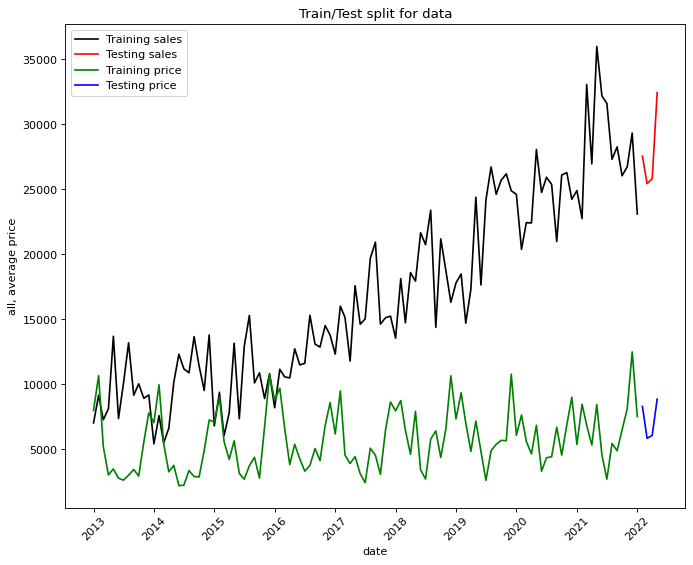

In [ ]:
train = ts[:'2022-01-22']
test = ts['2022-01-22':]
train_a = ts_a[:'2022-01-22']
test_a = ts_a['2022-01-22':]
print(test)
print(test_a)
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(train, color = "black", label = 'Training sales')
plt.plot(test, color = "red", label = 'Testing sales')
plt.plot(train_a, color = "green", label = 'Training price')
plt.plot(test_a, color = "blue", label = 'Testing price')
plt.ylabel('all, average price')
plt.xlabel('date')
plt.legend()
plt.xticks(rotation=45)
plt.title("Train/Test split for data")

# 1. multi-step forecasting

checking the stationarity

We need to check if the data has stable variables such as mean or variance. We chech if it constant by Augmented Dickey-Fuller Test (adfuller()). This test returns adf, pvalue and critical_value. Test result is meaningful if pvalue is less than alpha(0.05).
Null hypothesis - time series data is not stationary. 

In [ ]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The time series are stationary')
    else:
        print('The time series are NOT stationary')

checking our time series data

In [ ]:
check_stationarity(train)

The time series are NOT stationary


In [ ]:
check_stationarity(train_a)

The time series are NOT stationary


transforming the data by differencing it

In [ ]:
ts_diff = train.diff()
ts_diff.dropna(inplace=True)
check_stationarity(ts_diff)

The time series are stationary


In [ ]:
ts_diff_a = train_a.diff(2)
ts_diff_a.dropna(inplace=True)
check_stationarity(ts_diff_a)

The time series are stationary


after it decame stationary after one defferencing d parameter equals to 1

In [ ]:
d = 1

In [ ]:
d_a = 1

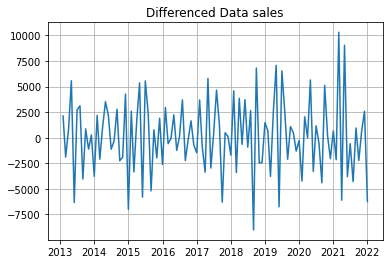

In [ ]:
plt.plot(ts_diff)
plt.title('Differenced Data sales')
plt.grid()
plt.show()

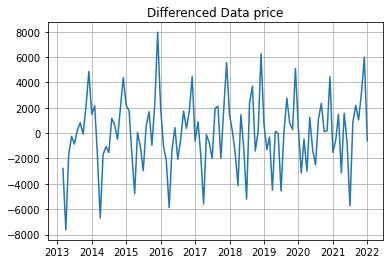

In [ ]:
plt.plot(ts_diff_a)
plt.title('Differenced Data price')
plt.grid()
plt.show()

SARIMA model parameters 

SARIMA model uses 3 parameters - p, d, q. D was found out earlier. It tell how much it takes to make the data stationary.Let's now plot Partual Autocorrection (PACF) to find p parameter(plot_pacf()). Maximum value of p according to plot is 12, so we set up p as 12. 

for sales

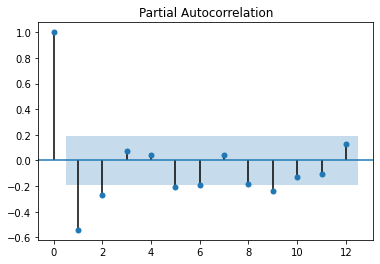

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(ts_diff, lags =12)
plt.show()

In [ ]:
p = 12

for price

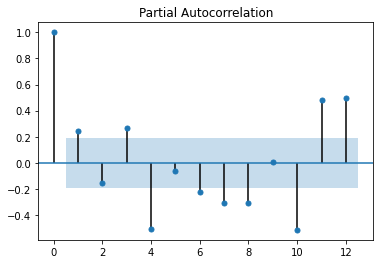

In [ ]:
plot_pacf(ts_diff_a, lags =12)
plt.show()

In [ ]:
p_a = 12

Autocorrelation (ACF) for determining value of q parameter. 

for sales

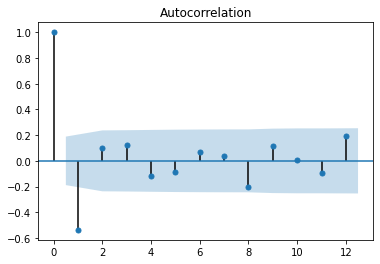

In [ ]:
plot_acf(ts_diff, lags =12)
plt.show()

In [ ]:
q = 12

for price

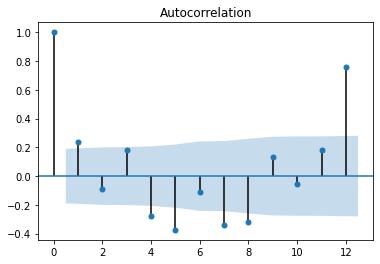

In [ ]:
plot_acf(ts_diff_a, lags =12)
plt.show()

In [ ]:
q_a = 12

creating the model and fitting it with the data

In [ ]:
model = SARIMAX(train, order=(p,d,q)) #sales
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to con

In [ ]:
model_a = SARIMAX(train_a, order=(p_a,d_a,q_a)) #price
model_fit_a = model_a.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to con

the model is forecasting number of steps that equals to the lenght of the data

In [ ]:
n_test = test.shape[0] #sales
ts_pred = model_fit.forecast(steps=n_test)

In [ ]:
#price
n_test_a = test_a.shape[0] 
ts_pred_a = model_fit_a.forecast(steps=n_test_a)

plotting the comparison between predicted and actual time series data

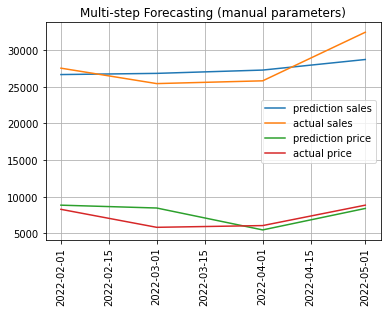

In [ ]:
plt.plot(ts_pred, label='prediction sales')
plt.plot(test, label='actual sales')
plt.plot(ts_pred_a, label='prediction price')
plt.plot(test_a, label='actual price')
plt.title('Multi-step Forecasting (manual parameters)')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.show()

Normalized Root Mean Square Error (NRMSE) for evaluating the model

In [ ]:
nrmse = rmse(ts_pred, test)/(np.max(test)-np.min(test))
nrmse

0.2762330653513335

In [ ]:
nrmse_a = rmse(ts_pred_a, test_a)/(np.max(test_a)-np.min(test_a))
nrmse_a

0.46235079252089856

# 2. single-step forecasting

In [ ]:
ts_train_step = train #sales
ts_pred_step = pd.Series()
for i in range(0, n_test):
    model_step = SARIMAX(ts_train_step, order=(p,d,q))
    model_step_fit = model_step.fit()
    current_pred = model_step_fit.forecast(steps=1)
    ts_train_step = ts_train_step.append(current_pred)
    ts_pred_step = ts_pred_step.append(current_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters

In [ ]:
ts_train_step_a = train_a #price
ts_pred_step_a = pd.Series()
for i in range(0, n_test_a):
    model_step_a = SARIMAX(ts_train_step_a, order=(p,d,q))
    model_step_fit_a = model_step_a.fit()
    current_pred_a = model_step_fit_a.forecast(steps=1)
    ts_train_step_a = ts_train_step_a.append(current_pred)
    ts_pred_step_a = ts_pred_step_a.append(current_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters

In [ ]:
nrmse = rmse(ts_pred_step, test)/(np.max(test)-np.min(test))
nrmse

0.31124973613177925

In [ ]:
nrmse_a = rmse(ts_pred_step_a, test_a)/(np.max(test_a)-np.min(test_a))
nrmse_a

7.124002742847805

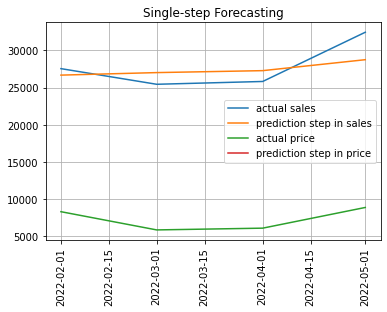

In [ ]:
plt.plot(test, label='actual sales')
plt.plot(ts_pred_step, label='prediction step in sales')
plt.plot(test_a, label='actual price')
plt.plot(ts_pred_step_a, label='prediction step in price') #prediction is out of range since the eror is more than one
plt.title('Single-step Forecasting')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.show()

this prediction type works well for sales but not for price prediction

# 3. automatically setted parameters with multi-step forcasting model

single-step model shows worse results than multi-step model

In [ ]:
import pmdarima as pm
stepwise_model = pm.auto_arima(train,start_p=1, d=1, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(train)

ARIMA(order=(0, 1, 4), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
stepwise_model_a = pm.auto_arima(train_a,start_p=1, d=1, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model_a.fit(train_a)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

parameters for sales were shown as the next: ARIMA(order=(0, 1, 4), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)
and for price: ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

In [ ]:
ts_pred_auto = stepwise_model.predict(n_periods=n_test)

In [ ]:
ts_pred_auto_a = stepwise_model_a.predict(n_periods=n_test_a)

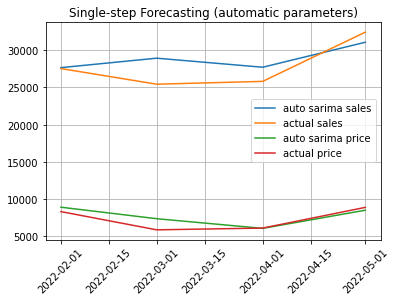

In [ ]:
plt.plot(test.index,ts_pred_auto, label='auto sarima sales')
plt.plot(test, label='actual sales')
plt.plot(test_a.index,ts_pred_auto_a, label='auto sarima price')
plt.plot(test_a, label='actual price')
plt.title('Single-step Forecasting (automatic parameters)')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
nrmse = rmse(ts_pred_auto, test)/(np.max(test)-np.min(test))
nrmse

0.30074391502972125

In [ ]:
nrmse_a = rmse(ts_pred_auto_a, test_a)/(np.max(test_a)-np.min(test_a))
nrmse_a

0.2740368108212265

 4. The last approach is called **decomposition**. With this approach we can decompose time-series data to the main components it contains so we can analyse separately each of them. Here after the decomposition by seasonal_decompose() we can obtain seasonality. trend and residuals of the data.

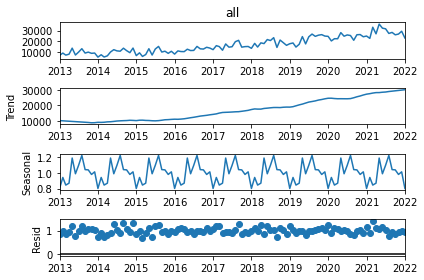

In [ ]:
ts_decomposed = seasonal_decompose(train,model='multiplicative',extrapolate_trend=True) #sales
ts_trend = ts_decomposed.trend
ts_seasonal = ts_decomposed.seasonal
ts_residual = ts_decomposed.resid
ts_decomposed.plot()
plt.show()

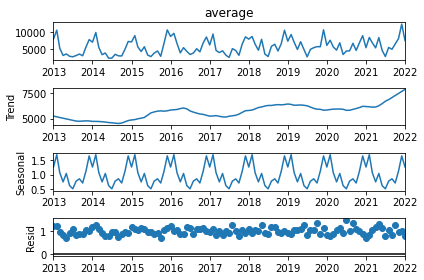

In [ ]:
ts_decomposed_a = seasonal_decompose(train_a,model='multiplicative',extrapolate_trend=True) #price
ts_trend_a = ts_decomposed_a.trend
ts_seasonal_a = ts_decomposed_a.seasonal
ts_residual_a = ts_decomposed_a.resid
ts_decomposed_a.plot()
plt.show()

let's check if the trend time series data is stable

In [ ]:
check_stationarity(ts_trend) #sales

The time series are NOT stationary


In [ ]:
check_stationarity(ts_trend_a) #price

The time series are NOT stationary


it is not, so we have to difference it to make it stable

In [ ]:
ts_trend_diff = ts_trend.diff()

ts_trend_diff.dropna(inplace=True)
check_stationarity(ts_trend_diff)

The time series are NOT stationary


In [ ]:
ts_trend_diff_a = ts_trend_a.diff()

ts_trend_diff_a.dropna(inplace=True)
check_stationarity(ts_trend_diff_a)

The time series are stationary


ts_trend_diff = ts_trend.diff()
ts_trend_diff.dropna(inplace=True)
check_stationarity(ts_trend_diff)

In [ ]:
d = 2

In [ ]:
d_a = 1

at this time let's try arima model and seasonality is false

for sales

In [ ]:
stepwise_model = pm.auto_arima(ts_trend,start_p=1, d=2, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=False, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(ts_trend)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


ARIMA(order=(2, 2, 1), scoring_args={}, suppress_warnings=True)

for price

In [ ]:
stepwise_model_a = pm.auto_arima(ts_trend_a,start_p=1, d=1, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=False, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model_a.fit(ts_trend_a)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
trend_pred_auto = stepwise_model.predict(n_periods=n_test) #sales

In [ ]:
trend_pred_auto_a = stepwise_model_a.predict(n_periods=n_test_a) #price

prediction of the seasonality

In [ ]:
check_stationarity(ts_seasonal) #sales

The time series are stationary


In [ ]:
check_stationarity(ts_seasonal) #price

The time series are stationary


it is stable so we set up equals to 0

In [ ]:
d = 0

In [ ]:
d_a = 0

In [ ]:
stepwise_model = pm.auto_arima(ts_seasonal,start_p=1, d=0, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=True,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(ts_seasonal)
seasonal_pred_auto = stepwise_model.predict(n_periods=n_test) #sales

In [ ]:
stepwise_model_a = pm.auto_arima(ts_seasonal_a,start_p=1, d=0, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=True,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model_a.fit(ts_seasonal_a)
seasonal_pred_auto_a = stepwise_model_a.predict(n_periods=n_test_a) #price

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(0,0,1)(2,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

 the product between the seasonal and the trend components

In [ ]:
ts_pred_decompose = trend_pred_auto * seasonal_pred_auto #sales

In [ ]:
ts_pred_decompose_a = trend_pred_auto_a * seasonal_pred_auto_a #price

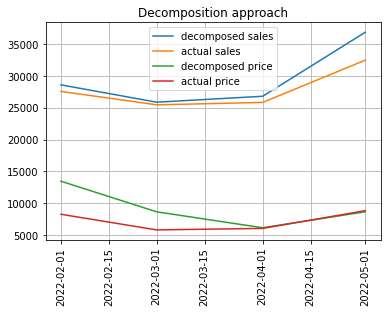

In [ ]:
plt.plot(test.index, ts_pred_decompose, label='decomposed sales')
plt.plot(test, label='actual sales')
plt.plot(test_a.index, ts_pred_decompose_a, label='decomposed price')
plt.plot(test_a, label='actual price')
plt.title('Decomposition approach')
plt.grid()
plt.xticks(rotation=90)
plt.legend()
plt.show()

RMSE error

In [ ]:
nrmse = rmse(ts_pred_decompose, test)/(np.max(test)-np.min(test)) #sales
nrmse

0.32926325030517

In [ ]:
nrmse_a = rmse(ts_pred_decompose_a, test_a)/(np.max(test_a)-np.min(test_a)) #price
nrmse_a

0.9775418378053337

# Conclusion: all demonstrated models have their pros and cons. In our case the least error for sales was shown the model *multi-step forecasting with SARIMA model and manual setting of the parameters *(p, d, q). It had the error ~0.2.  For prediction of price the best model was number 3 - the error for price prediction was ~0.27. So, we decided it would be good to use model number 3 *automatically setted parameters with multi-step forcasting model* since it is pretty accurate and simpler to set up. It had both good pretty accurate prediction both for sales and average price.

We will use the 3d model for predicting in different dataset with Monstera plants and 난 plants.